In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
import math
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline
import plotly.graph_objs as go

In [2]:
happiness_report = "happiness-report-2008-2018.csv"
region="Country-names-with-region.csv"

In [3]:
happiness_report_df = pd.read_csv(happiness_report)
region_df=pd.read_csv(region)

In [4]:
happiness_report_df.head()

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
0,Afghanistan,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,...,NaN,NaN,0.441906,0.286315,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,...,NaN,NaN,0.327318,0.275833,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,...,NaN,NaN,0.336764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.710385,...,NaN,NaN,0.344540,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
region_df.head()

,Country name,Region
0,Afghanistan,South Asia
1,Albania,Central and Eastern Europe
2,Algeria,Middle East and North Africa
3,Angola,Sub-Saharan Africa
4,Argentina,Latin America and Caribbean


In [6]:
happiness_df=happiness_report_df.merge(region_df, on='Country name', how='left')

In [7]:
happiness_df.head()

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,...,"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014",Region
0,Afghanistan,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South Asia
1,Afghanistan,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,...,NaN,0.441906,0.286315,NaN,NaN,NaN,NaN,NaN,NaN,South Asia
2,Afghanistan,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,...,NaN,0.327318,0.275833,NaN,NaN,NaN,NaN,NaN,NaN,South Asia
3,Afghanistan,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,...,NaN,0.336764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South Asia
4,Afghanistan,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.710385,...,NaN,0.344540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South Asia


In [8]:
happiness_df.columns

Index(['Country name', 'Year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-16',
       'gini of household income reported in Gallup, by wp5-year',
       'Most people can be trusted, Gallup',
       'Most people can be trusted, WVS round 1981-1984',
       'Most people can be trusted, WVS round 1989-1993',
       'Most people can be trusted, WVS round 1994-1998',
       'Most people can be trusted, WVS round 1999-2004',
       'Most people can be trusted, WVS round 2005-2009',
       'Most people can be trusted, WV

In [9]:
happiness_df[['Country name', 'Region', 'Year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-16',
       'gini of household income reported in Gallup, by wp5-year',
       'Most people can be trusted, Gallup',
       'Most people can be trusted, WVS round 1981-1984',
       'Most people can be trusted, WVS round 1989-1993',
       'Most people can be trusted, WVS round 1994-1998',
       'Most people can be trusted, WVS round 1999-2004',
       'Most people can be trusted, WVS round 2005-2009',
       'Most people can be trusted, WVS round 2010-2014']]

,Country name,Region,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
0,Afghanistan,South Asia,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,South Asia,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,...,NaN,NaN,0.441906,0.286315,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,South Asia,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,...,NaN,NaN,0.327318,0.275833,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,South Asia,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,...,NaN,NaN,0.336764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,South Asia,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,...,NaN,NaN,0.344540,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Afghanistan,South Asia,2013,3.572100,7.522238,0.483552,52.560001,0.577955,0.070403,0.823204,...,NaN,NaN,0.304368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Afghanistan,South Asia,2014,3.130896,7.516955,0.525568,52.880001,0.508514,0.113184,0.871242,...,NaN,NaN,0.413974,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Afghanistan,South Asia,2015,3.982855,7.500539,0.528597,53.200001,0.388928,0.089091,0.880638,...,NaN,NaN,0.596918,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Afghanistan,South Asia,2016,4.220169,7.497038,0.559072,53.000000,0.522566,0.051365,0.793246,...,NaN,NaN,0.418629,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Afghanistan,South Asia,2017,2.661718,7.497755,0.490880,52.799999,0.427011,-0.112198,0.954393,...,NaN,NaN,0.286599,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
happy_df = happiness_df[['Country name', 'Region', 'Year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)','gini of household income reported in Gallup, by wp5-year',
       'Most people can be trusted, Gallup']]
happy_df.head()

,Country name,Region,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup"
0,Afghanistan,South Asia,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,South Asia,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,0.441906,0.286315
2,Afghanistan,South Asia,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,0.327318,0.275833
3,Afghanistan,South Asia,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,0.336764,NaN
4,Afghanistan,South Asia,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,0.344540,NaN


In [11]:
happy_df= happy_df.rename(columns={'Life Ladder':'Happiness Score', 'Log GDP per capita': 'GDP','Freedom to make life choices':'Freedom'})
happy_df.head()

,Country name,Region,Year,Happiness Score,GDP,Social support,Healthy life expectancy at birth,Freedom,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup"
0,Afghanistan,South Asia,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,South Asia,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,0.441906,0.286315
2,Afghanistan,South Asia,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,0.327318,0.275833
3,Afghanistan,South Asia,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,0.336764,NaN
4,Afghanistan,South Asia,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,0.344540,NaN


In [12]:
happy_df.dropna()

,Country name,Region,Year,Happiness Score,GDP,Social support,Healthy life expectancy at birth,Freedom,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup"
36,Argentina,Latin America and Caribbean,2009,6.424133,9.750825,0.918693,67.180000,0.636646,-0.125714,0.884742,0.863786,0.236901,0.273822,0.023821,-0.570944,2.067742,0.321871,0.439,0.368422,0.169295
37,Argentina,Latin America and Caribbean,2010,6.441067,9.836924,0.926799,67.300003,0.730258,-0.121725,0.854695,0.846136,0.210975,0.351856,0.138446,-0.469284,2.107838,0.327250,0.430,0.366742,0.228952
49,Armenia,Commonwealth of Independent States,2009,4.177582,8.784616,0.680007,65.099998,0.441413,-0.199945,0.881887,0.542872,0.411280,0.373952,-0.324350,-0.207272,2.179482,0.521709,0.280,0.427577,0.156644
73,Austria,Western Europe,2010,7.302679,10.676744,0.914193,71.400002,0.895980,0.129112,0.546145,0.814719,0.155793,0.486447,1.291470,1.670085,1.753248,0.240083,0.303,0.367440,0.300665
108,Bangladesh,South Asia,2010,4.858481,7.800871,0.549398,60.700001,0.659006,-0.010436,0.773530,0.628580,0.292425,0.646873,-0.846942,-0.860694,1.930316,0.397309,0.321,0.450517,0.148750
120,Belarus,Commonwealth of Independent States,2009,5.564131,9.618182,0.907778,62.000000,0.679293,-0.210205,0.675543,0.565597,0.223292,0.548333,-0.529404,-0.977223,1.937372,0.348189,0.277,0.338963,0.356408
133,Belgium,Western Europe,2010,6.853514,10.623421,0.930570,70.800003,0.806930,0.018613,0.697366,0.828259,0.240364,0.336516,1.085667,1.445168,1.603352,0.233946,0.284,0.393781,0.306121
160,Bolivia,Latin America and Caribbean,2009,6.085579,8.571310,0.831320,60.500000,0.778939,-0.030179,0.762605,0.796764,0.372369,0.468150,-0.250256,-0.805518,1.977046,0.324874,0.492,0.417889,0.144024
195,Brazil,Latin America and Caribbean,2009,7.000832,9.521485,0.912818,64.260002,0.766716,-0.065055,0.722515,0.832505,0.274103,0.427179,0.344150,-0.055284,2.236215,0.319421,0.537,0.428937,0.134151
206,Bulgaria,Central and Eastern Europe,2010,3.912276,9.634516,0.843272,65.699997,0.544536,-0.146652,0.940970,0.545824,0.237594,0.365286,0.445788,0.127513,1.968557,0.503174,0.357,0.376450,0.222936


In [13]:
happy_df.groupby('Region')['Happiness Score','GDP'].mean().sort_values(by="Happiness Score", ascending=False)

,Happiness Score,GDP
Region,,
North America and ANZ,7.286995,10.650564
Western Europe,6.808758,10.623527
Latin America and Caribbean,6.005871,9.212069
East Asia,5.592699,10.071700
Central and Eastern Europe,5.444195,9.813616
Middle East and North Africa,5.391712,9.748548
Southeast Asia,5.342963,9.128659
Commonwealth of Independent States,5.145158,9.027644
South Asia,4.587340,8.206614


[Text(0, 0.5, 'Happiness Score'), Text(0.5, 0, 'Country name')]

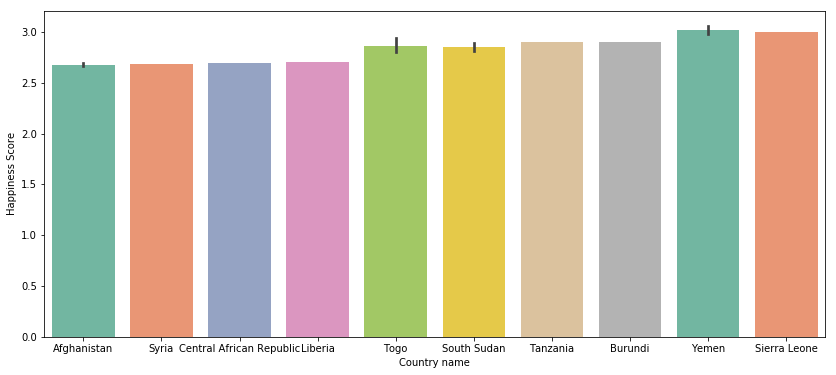

In [14]:
plt.figure(figsize=(14,6))
topCountry=happy_df.sort_values(by=['Happiness Score'],ascending=True).head(15)
ax=sns.barplot(x='Country name',y='Happiness Score', data=topCountry, palette = 'Set2')
ax.set(xlabel='Country name', ylabel='Happiness Score')

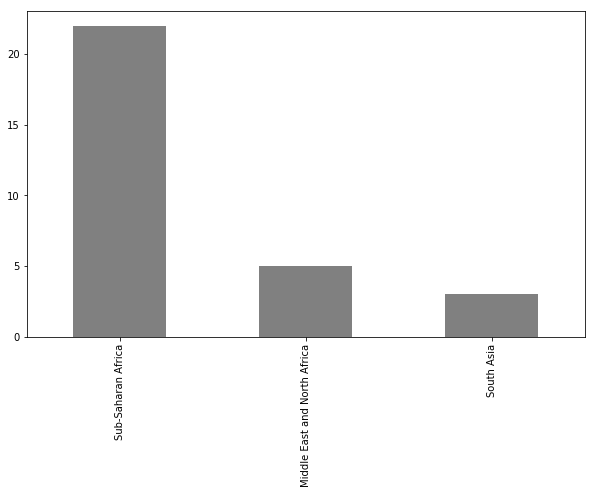

In [15]:
plt.figure(figsize=(10,6))
list = happy_df.sort_values(by=['Happiness Score'],ascending=True)['Region'].head(30).value_counts()
list.plot(kind = 'bar', color = 'grey')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001B79AE6D5F8>,
      dtype=object)

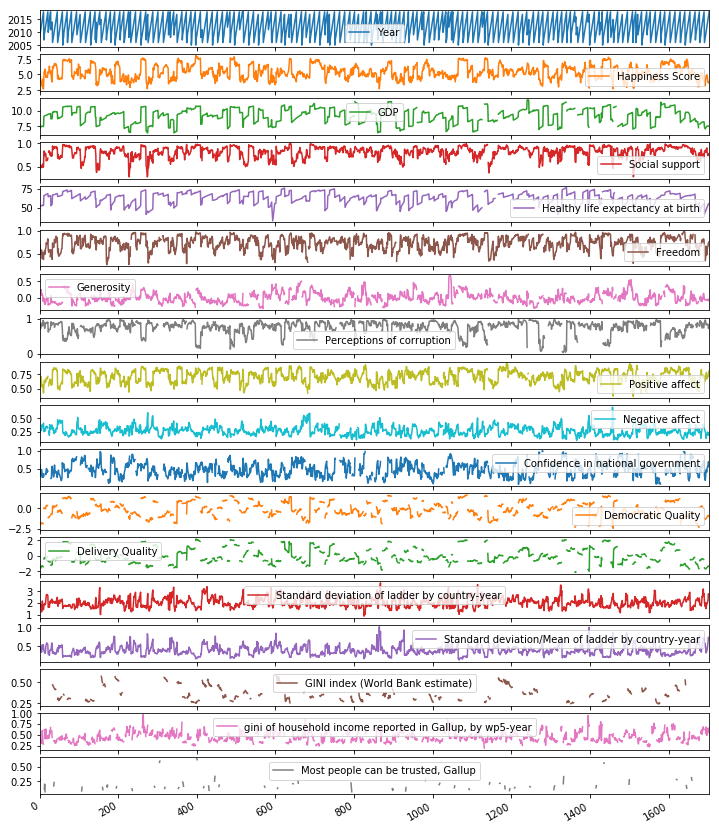

In [16]:
# Basic plotting on dataframe
happy_df.plot(subplots=True, figsize=(12, 16))

C:\Users\carit\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning:

invalid value encountered in greater_equal

C:\Users\carit\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning:

invalid value encountered in less_equal



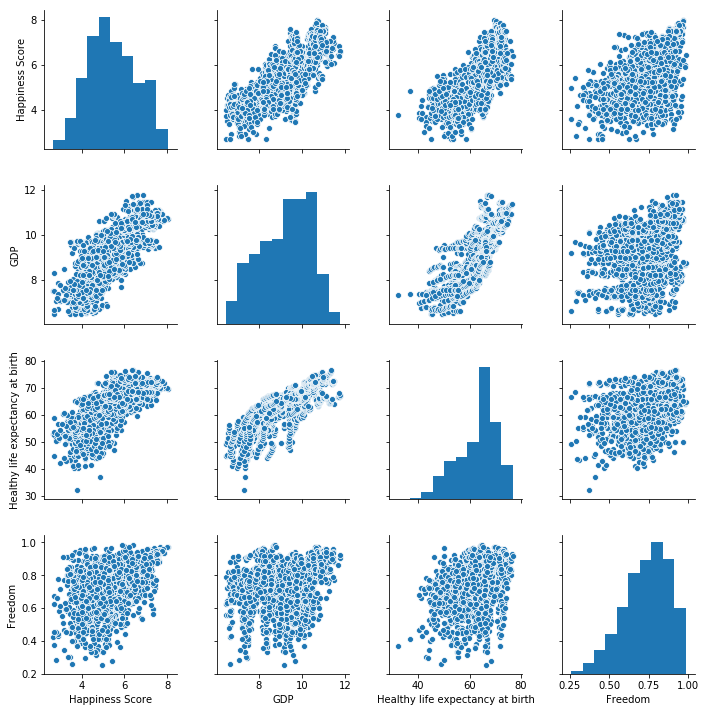

In [17]:
sns.pairplot(happy_df[['Happiness Score','GDP','Healthy life expectancy at birth', 'Freedom']])

AttributeError: module 'seaborn' has no attribute 'plt'

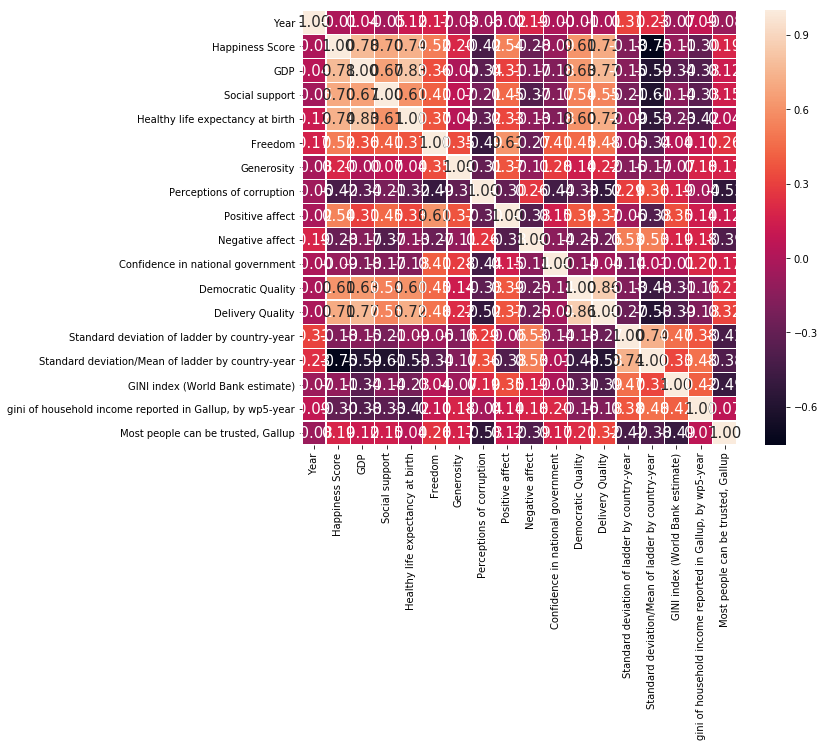

In [18]:
plt.figure(figsize=(10,8))
corr = happy_df.drop(['Country name','Region'],axis = 1).corr()
sns.heatmap(corr, cbar = True, square = True, annot=True, linewidths = .5, fmt='.2f',annot_kws={'size': 15}) 
sns.plt.title('Heatmap of Correlation Matrix')
plt.show()

<Figure size 864x864 with 0 Axes>

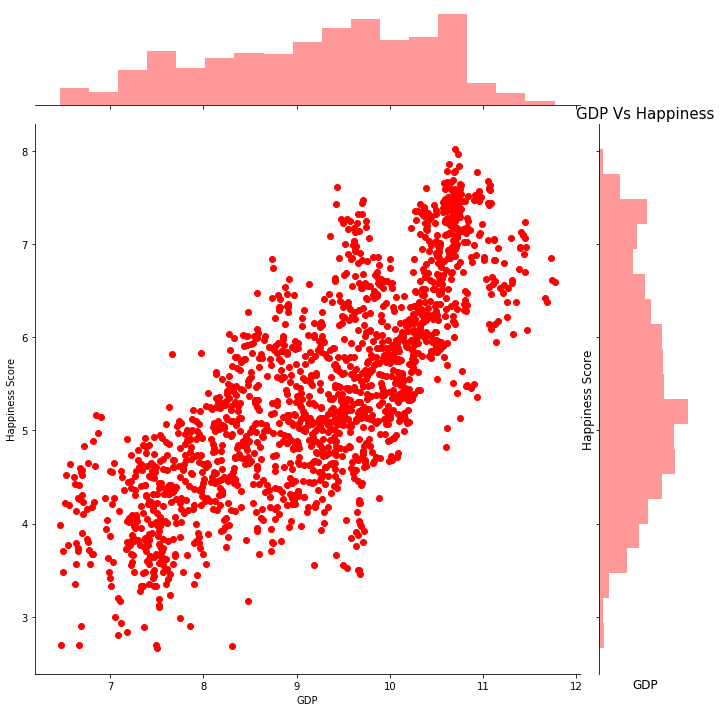

In [20]:
plt.figure(figsize=(12,12))
sns.jointplot(x = 'GDP', y = 'Happiness Score', data = happy_df, height=10, color='red')
plt.ylabel('Happiness Score', fontsize=12)
plt.xlabel('GDP', fontsize=12)
plt.title('GDP Vs Happiness', fontsize=15)
plt.show()

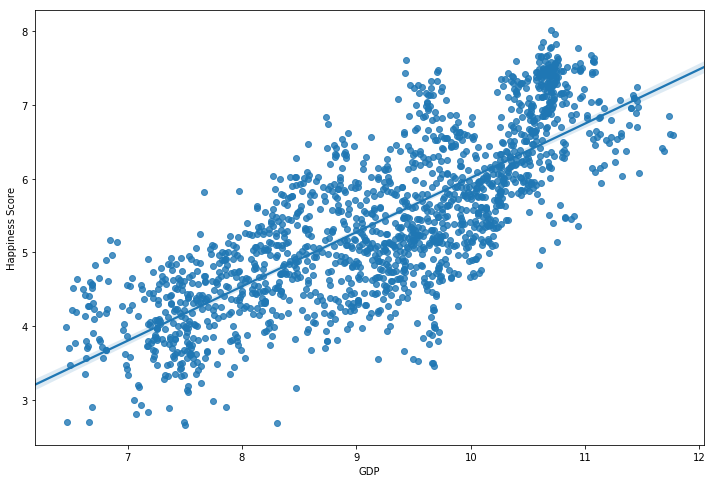

In [21]:
plt.figure(figsize=(12,8))
sns.regplot(x='GDP',y='Happiness Score' ,data=happy_df)
#so there is a linear relation between GDP & Happiness Score

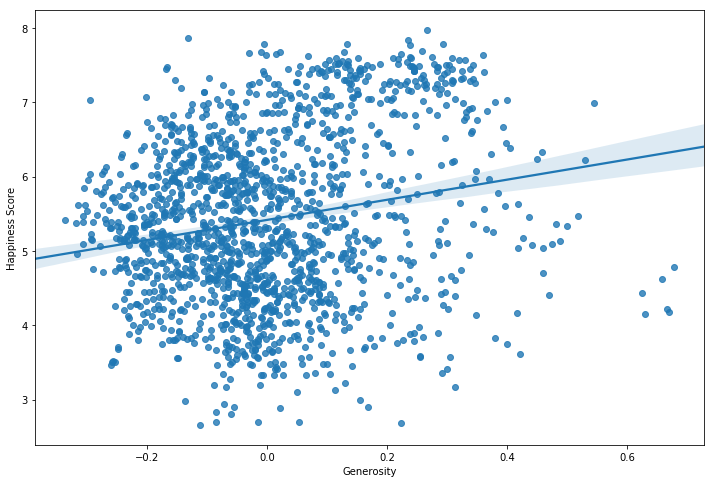

In [22]:
plt.figure(figsize=(12,8))
sns.regplot(x='Generosity',y='Happiness Score' ,data=happy_df)

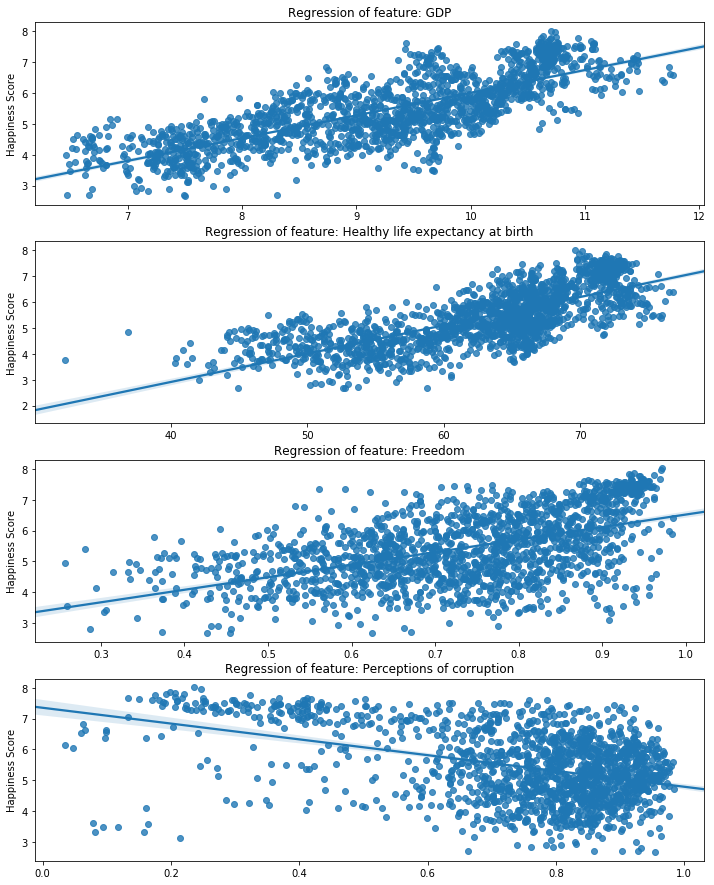

In [23]:
cols = ['GDP','Healthy life expectancy at birth','Freedom','Perceptions of corruption']
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(cols):
    ax = plt.subplot(gs[i])
    #sns.distplot(df1[cn], bins=50)
    sns.regplot(x=happy_df[cn],y='Happiness Score' ,data =happy_df)
    ax.set_xlabel('')
    ax.set_title('Regression of feature: ' + str(cn))
plt.show()

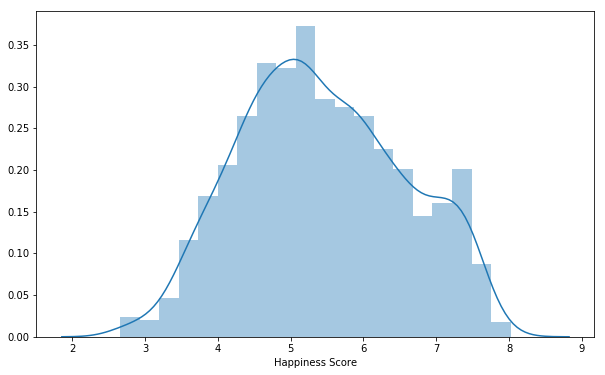

In [24]:
plt.figure(figsize=(10,6))
sns.distplot(happy_df['Happiness Score'],kde=True, bins = 20)
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001B79E849EB8>],
      dtype=object)

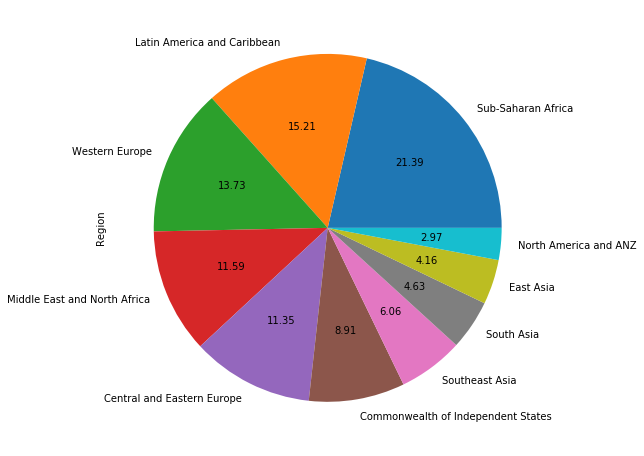

In [25]:
#Percantage on country's regional listing 
happy_df['Region'].value_counts().plot.pie(subplots=True, figsize=(8, 8), autopct='%.2f')

In [26]:
X = happy_df.drop(['Happiness Score', 'Country name', 'Region'], axis=1)
y = happy_df['Happiness Score']

In [ ]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()

#scaler.fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)
#print('Standardized features\n')
#print(str(X_train[:4]))

In [ ]:
#from sklearn.linear_model import LinearRegression
#lm = LinearRegression()
#lm.fit(X_train, y_train)
#y_pred = lm.predict(X_test.fillna(X_test.mean()))

In [ ]:
#result_lm = pd.DataFrame({
#    'Actual':y_test,
#    'Predict':y_pred
#})
#result_lm['Diff'] = y_test - y_pred
#result_lm.head()

In [ ]:
#sns.regplot(x='Actual',y='Predict',data=result_lm)

In [ ]:
#from sklearn import metrics
#print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
#print('MSE:', metrics.mean_squared_error(y_test, y_pred))
#print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
#from sklearn.ensemble import RandomForestRegressor
#rf = RandomForestRegressor()
#rf.fit(X_train,y_train)
#y_pred = rf.predict(X_test)

In [ ]:
#result_rf = pd.DataFrame({
#    'Actual':y_test,
#    'Predict':y_pred
#})
#result_rf['Diff'] = y_test - y_pred
#result_rf.head()

In [ ]:
#plt.figure (figsize = (16, 8))
#sns.pointplot(x='Actual',y='Predict',data=result_rf, dodge = True, color="#bb3f3f")
#plt.xticks(rotation = 90)
#plt.show()